In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
import skimage
from skimage.io import imread
from skimage.transform import resize
import cv2
from PIL import Image
import os


In [2]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [3]:
image_dataset = load_image_files("HTMLelements\\")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'HTMLelements'

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [5]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
y_pred = clf.predict(X_test)

In [7]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.97      0.95      0.96       122

    accuracy  

In [8]:
print(X_test)

[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.38553922 0.38578431 0.37377451 ... 0.04387255 0.04387255 0.04387255]
 ...
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.71398591 0.71006434 0.6904565  ... 0.15634191 0.3198223  0.6950674 ]
 [0.98823529 0.98823529 0.98823529 ... 0.99607843 0.99607843 0.99607843]]


In [29]:

def image_process(image):
    
    
        print(image)
        hsv_image = cv2.imread(image,1) # pretend its HSV
        #noise_img = sp_noise(hsv_image,0.2)
        rgbimg = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
        image_gray = cv2.cvtColor(rgbimg, cv2.COLOR_BGR2GRAY)
        _,threshold = cv2.threshold(image_gray,127, 255,0)
        plt.imshow(image_gray, cmap='gray')
    
        contours, hierarchy = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

        left_arr = []
        right_arr = []
        top_arr = []
        bottom_arr = []

        for cnt in contours:
            leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
            rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
            topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
            bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
            left_arr.append(leftmost)
            right_arr.append(rightmost)
            top_arr.append(topmost)
            bottom_arr.append(bottommost)
            

        left_arr.sort()
        right_arr.sort(reverse=True)
        top_arr.sort(key = lambda x: x[1])
        bottom_arr.sort(reverse=True,key = lambda x: x[1])

        left_arr.pop(0)
        right_arr.pop(0)
        top_arr.pop(0)
        bottom_arr.pop(0)

        advanced_coords = (left_arr[0][0]-10,top_arr[0][1]-10,right_arr[0][0]+10,bottom_arr[0][1]+10)
        im = Image.open(image)
        im1 = im.crop(advanced_coords) 
        newsize = (200, 200) 
        im1 = im1.resize(newsize)
        os.remove(image)
        im1.save(image)
        


C:\Users\mayan\Desktop\8thSemNeuralNetwork\samples\Untitled.jpg


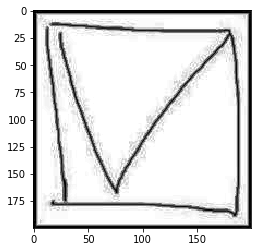

In [32]:
dimension = (64,64)
samp_data=[]
mapper = {1:"Input",0:"Image"}
for file in os.listdir("C:\\Users\\mayan\\Desktop\\8thSemNeuralNetwork\\samples"):
    image_process("C:\\Users\\mayan\\Desktop\\8thSemNeuralNetwork\\samples\\"+file)
    img = skimage.io.imread("C:\\Users\\mayan\\Desktop\\8thSemNeuralNetwork\\samples\\"+file)
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
    samp_data.append(img_resized.flatten())



In [33]:
list(clf.predict(samp_data)).count(1)/len(samp_data)

1.0

In [25]:
list(clf.predict(samp_data)).count(0)/len(samp_data)

0.0

In [26]:
for i in list(clf.predict(samp_data)):
    print(mapper[i],end=" ")

Input 

In [15]:
import pickle
# save the classifier
with open('C:\\Users\\mayan\\Desktop\\8thSemProject\\8thSemProject\\SVM.pkl', 'wb') as fid:
    pickle.dump(clf, fid)    


In [1]:
import pickle
clf = None
with open('C:\\Users\\mayan\\Desktop\\8thSemProject\\8thSemProject\\models\\SVM.pkl', 'rb') as fid:
    clf = pickle.load(fid)   